In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Import Dependencies</h1>

In [2]:
# Math module
import numpy as np

# Stats module
import statsmodels.api as sm

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Store data
%store -r model_fit
%store -r model_fitted_y

<h1>Scale-Location</h1>

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Explained</font>
<ul>
<li>This plot shows if residuals are spread equally along the ranges of predictors</li>
<li>Check the assumption of equal variance (homoscedasticity)</li>
<li>A horizontal line with equally (randomly) spread points is indicative of homoscedasticity.</li>    
<li>Seabon regplot can be used to plot data and a linear regression model fit.:<br><strong><code>seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)</code></strong></li>
<li>Additional information: <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html">Documentation</a></li>
</ul>
</div>

In [3]:
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

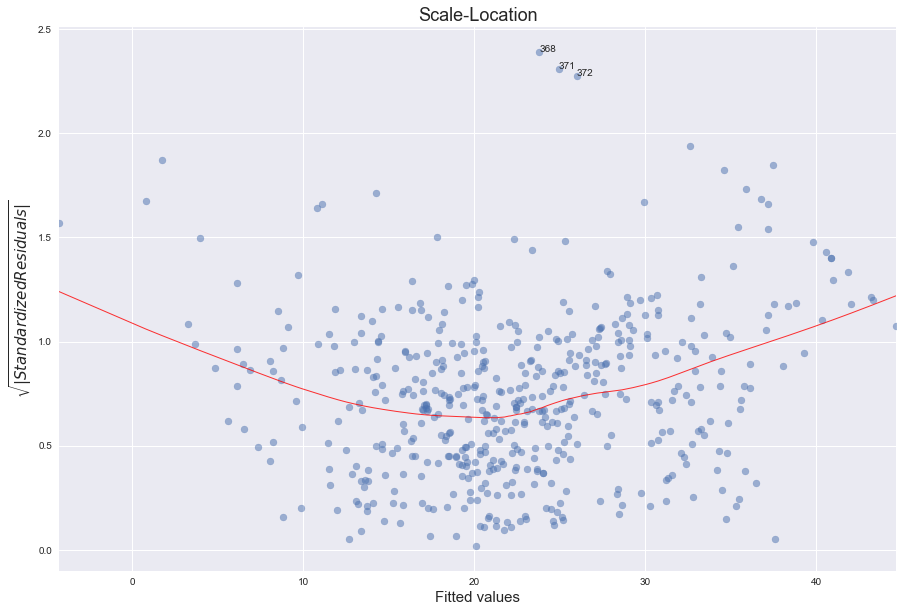

In [4]:
%matplotlib inline 
scale_location = plt.figure(figsize=(15,10))

# plot data
# this code will make the scatter plot but make it 
# transparent so the line plot is easier to see 
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)

# This will generate the regplot, and the scatter is set to false because we are
# already have the scatter plot of the data above, we just want the regression line.
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
scale_location.axes[0].set_title('Scale-Location')
scale_location.axes[0].set_xlabel('Fitted values')
scale_location.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    scale_location.axes[0].annotate(i,
    xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))

plt.show()    

<div style="font-size:16px; border:1px solid black; padding:10px">
<font color="blue">Observations:</font>
<ul>
    <li>Residuals spread wider and wider at both ends of fitted values.</li>
    <li>The graph has higher values on the left and on the right versus in the middle.</li>
</ul>
<font color="blue">Preliminary Conclusion:</font>
<ul>
<li>Data appears heteroscedastic</li>
<li>Something is wrong with the model being used and a higher-order model may be needed. aka a polynomial regression.</li>    
</ul>    
</div>

In [5]:
# Store data
%store model_norm_residuals
%store model_norm_residuals_abs_sqrt

Stored 'model_norm_residuals' (ndarray)
Stored 'model_norm_residuals_abs_sqrt' (ndarray)
